## Group Member Details

####  Gorle Mohan Rao             ( PGCBAA02A019 )
#### Sayam Roy                        ( PGCBAA02A055 )
#### Shivangi Pandey            ( PGCBAA02A058 )
#### Shristi Shah                        ( PGCBAA02A060	)
#### Vaibhav Rajaram Thakur ( PGCBAA02A071 )	

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf  # Statistical Modeling
from sklearn import linear_model       # Machine Learning

In [2]:
# To show multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('../data/Auto.csv')

In [4]:
df.head(n=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu


## 1. Examine The Relationship Between Dependent and Independent Variables(Numerical)

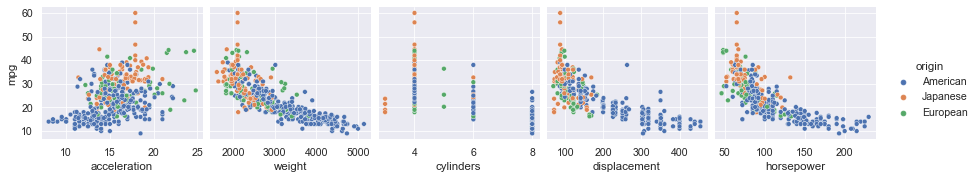

In [5]:
# mpg is positively correlated with acceleration and 
# negatively correlated with weight,cylinders,displacement,horsepower
# Comparison of different variables across origin
sns.set_theme('paper',font_scale=1.2)
g = sns.pairplot(data=df,y_vars=['mpg'],x_vars=['acceleration', 'weight','cylinders', 'displacement', 'horsepower'],
                 hue='origin')


### Insight 1 : Impact Of Number Of Cylinders On mpg Across Different Origin( Japanese 4 cylinder cars offers maximum mileage followed by European and American 4 cylinders)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

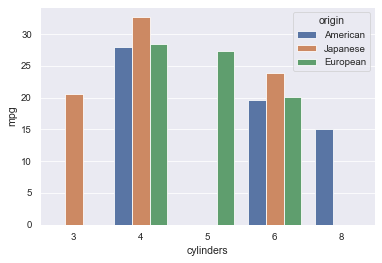

In [6]:
sns.set_theme('paper',font_scale =1.1)
sns.barplot(x='cylinders', y='mpg', hue='origin',ci=None,  data=df)

### Insight 2 : Identify Top 10 Cars On The Basis Of  Number Of Records Available and Average Of Their mpg( Mostly Japanese cars have a better Mileage, Mazda glc being the highest.American car Chevrolet Chevette also has good average mileage)

Text(0.5, 1.0, 'Box Plot For Top 10 Cars With Highest Mileage')

Text(0.5, 0, 'Cars')

Text(0, 0.5, 'mpg')

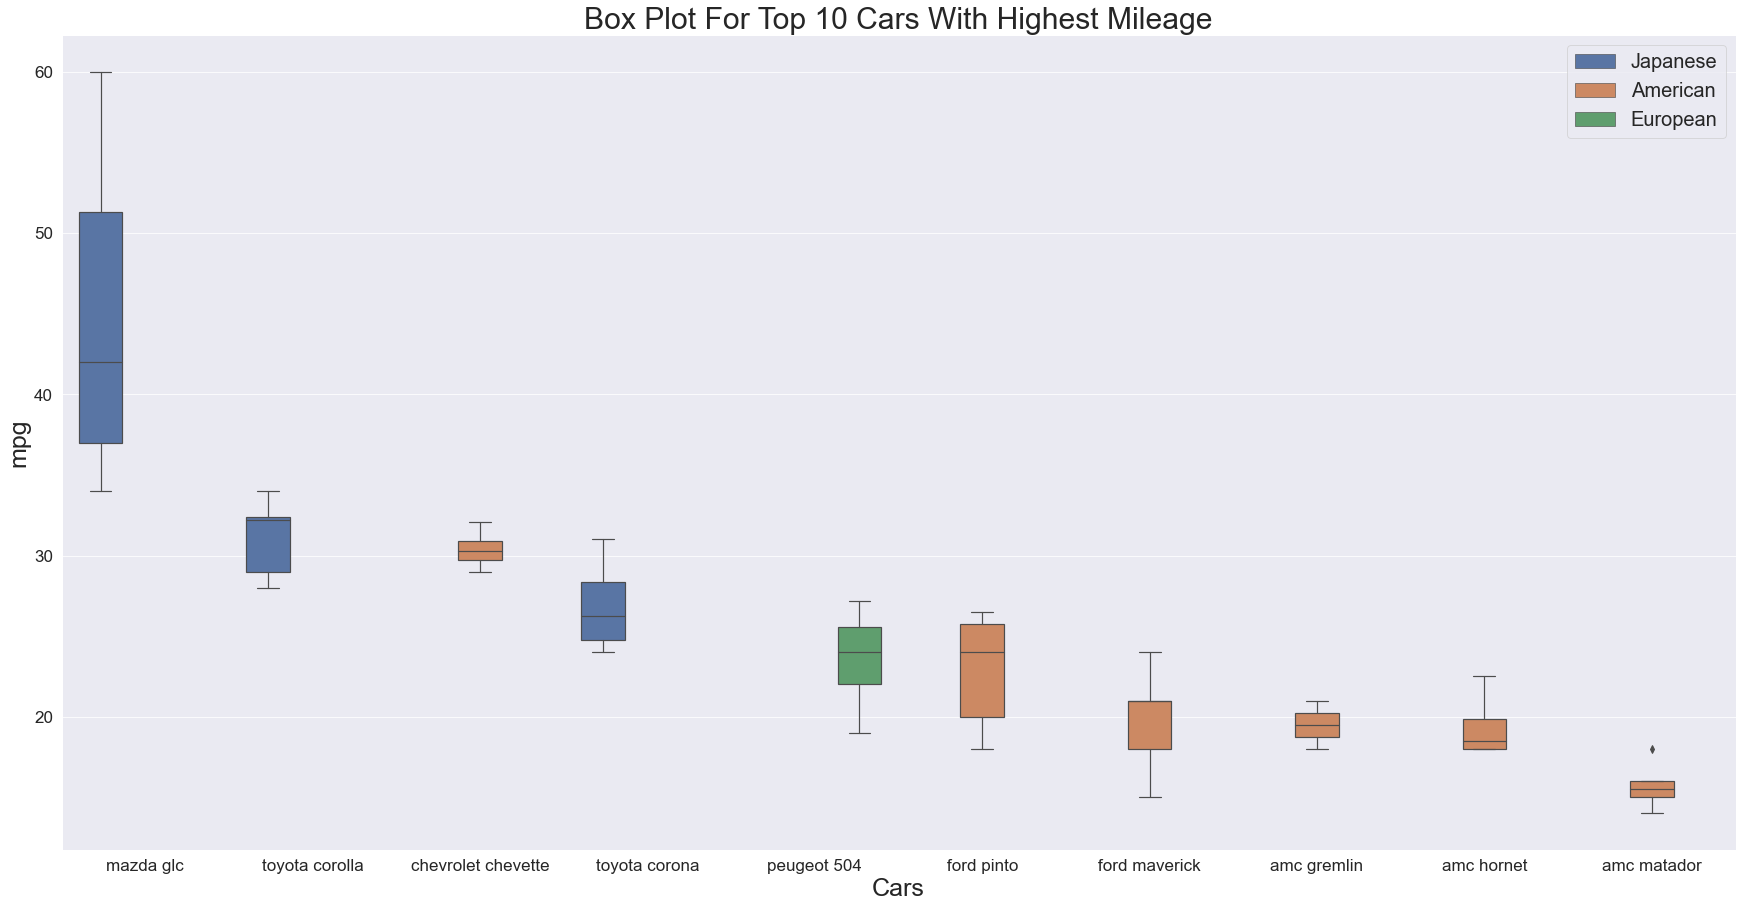

In [7]:
# new dataframe based on car record count 
count_of_mpg_per_car = df['mpg'].groupby(df['name']).count().reset_index()
df2 = count_of_mpg_per_car.sort_values('mpg',ascending = False).head(10)
df_new = df.merge(df2,
                 left_on=['name'],
                 right_on=['name'],
                how='right')
df_new.rename(columns = {'mpg_x': 'mpg', 'mpg_y': 'car_record_count'}, inplace = True)

# new dataframe using car record count to find average mpg.Select top 10 cars with highest average mpg.
average_of_mpg_per_car = df_new[df_new.car_record_count>=3].groupby(df_new['name']).mpg.mean().reset_index()
df_avg = average_of_mpg_per_car.sort_values('mpg',ascending = False).head(10)
df_new_avg_mpg_on_count = df_new.merge(df_avg,
                 left_on=['name'],
                 right_on=['name'],
                how='right')
df_new_avg_mpg_on_count.rename(columns = {'mpg_x': 'mpg', 'mpg_y': 'average mpg'}, inplace = True)

fig, axes = plt.subplots(figsize=(30,15))

axes = sns.boxplot(x='name', y='mpg', hue='origin',data= df_new_avg_mpg_on_count)
axes.set_title('Box Plot For Top 10 Cars With Highest Mileage',{'fontsize': 30 })
axes.set_xlabel('Cars')
axes. xaxis. label. set_size(25)
axes.set_ylabel('mpg')
axes. yaxis. label. set_size(25)
axes.tick_params(axis='x', labelsize=17)
axes.tick_params(axis='y', labelsize=17)
axes.legend(loc="upper right", frameon=True, fontsize=20)

### Insight 3 : Year On Year Mileage Trend Across 3 Origins(European cars have mpg from 16.2 to 44.3. In year 1980, there are some Japanese variant which offered mpg more than 40. There has been an overall rise in mpg in American cars over the years.)

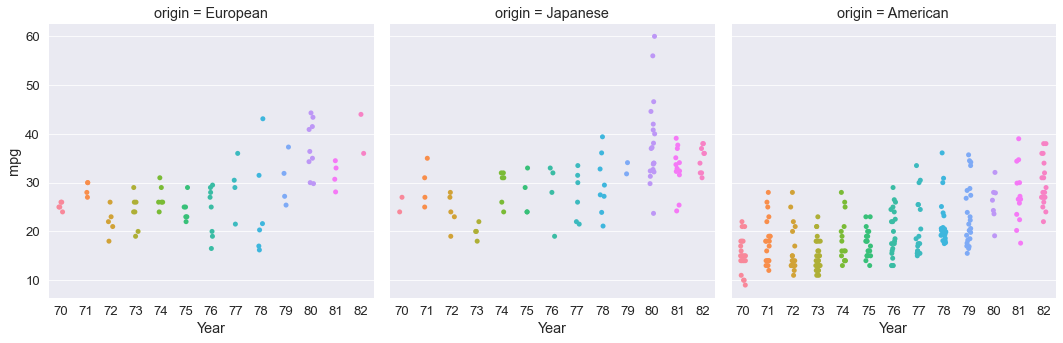

In [8]:
Sum_MPG_Offered_By_year = df['mpg'].groupby(df['year']).sum().reset_index()
df3 = Sum_MPG_Offered_By_year.sort_values('mpg',ascending = False)
df_new_MPG = df.merge(df3,
                 left_on=['year'],
                 right_on=['year'],
                how='right')
sns.set_theme('paper',font_scale=1.5)
facet = sns.catplot(x='year', y = 'mpg_x', data=df_new_MPG , col='origin', kind='strip')

facet.set_xlabels('Year')
facet.set_ylabels('mpg')

## 2. Identification And Handling Of Missing Values 

In [9]:
# There are 5 missing values for column horsepower

df.isnull().sum()
Replace_missing_with_zero = df.fillna(0).iloc[:403, :10]

# Going forward we can use dataframe , **Replace_missing_with_zero**

Replace_missing_with_zero.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

## 3. Predicting mpg (mile per gallon) based on horsepower  

### a. Identifying If There Are Any Outliers ??

<AxesSubplot:ylabel='mpg'>

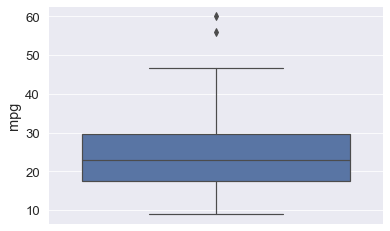

In [10]:
# Using Box plot for Univariate
# There are two outlying points between 50 and 60. these are outliers as there
# are not included in the box of other observation i.e no where near the quartiles.

sns.boxplot(data=Replace_missing_with_zero, y= 'mpg')


#### Position of the outlier(index location)

In [11]:
# using z - score 

z = np.abs(stats.zscore(Replace_missing_with_zero['mpg']))
# threshold value is chosen which is generally 3,as 99.7% of the data points lie between +/- 3 standard deviation 
threshold = 3
print(np.where(z > threshold))

(array([399, 401], dtype=int64),)


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

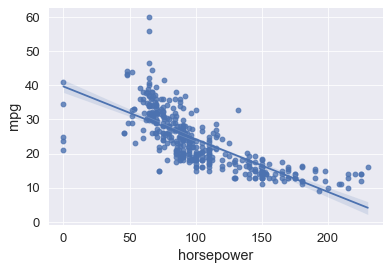

In [12]:
# Scatterplot with trendline

sns.regplot(y='mpg',x='horsepower',data=Replace_missing_with_zero)

#### mpg and Horsepower is negatively correlated

### b. Interpreting and Analysing Y - Intercept

In [13]:
# Creating the model

univariate_model = smf.ols('mpg ~ horsepower', data=Replace_missing_with_zero)
results = univariate_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     503.5
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           7.90e-73
Time:                        22:20:27   Log-Likelihood:                -1258.4
No. Observations:                 403   AIC:                             2521.
Df Residuals:                     401   BIC:                             2529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6501      0.757     52.398      0.000      38.163      41.138
horsepower    -0.1543      0.007    -22.439      0.000      -0.168      -0.141
==============================================================================
Omnibus:                       76.248   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.304
Skew:                           0.849   Prob(JB):                     6.59e-53
Kurtosis:                       6.381   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of determination (R-Squared) is 0.557 (55.7%), which suggests that 55.7% of the variance in mpg can be explained by horsepower alone. 

F-statistic can be used to understand if horsepower are significant in explaining the variance of the mpg. As F-statistic > F-critical/ Prob (F-statistic) is approximately 0 ,we can reject the null hypothesis(i.e.,β coef = 0) .The regression coefficients or slope (-0.1543) represent the change in mpg per unit change in Horsepower. It means the value of mpg decreases by 0.1543 with each unit increase in horsepower.

The y-intercept (39.6501) represents the value of mpg when horsepower has a value of 0. Here need to be cautious to interpret the y-intercept as (X=0) does not make any sense. In such cases, the values within the range of X should be considered interpreting the y-intercept. The p values associated with the horsepower is significant (p < 0.05), which suggests that horsepower significantly influences mpg. In other words, the given regression makes sense.

## 4. Regression With Weight, Origin and Horsepower(Independent variable)

In [14]:
# Creating multiple regression model

multivariate_model = smf.ols('mpg ~ weight+origin+horsepower', data=Replace_missing_with_zero)
results = multivariate_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     226.7
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          3.45e-101
Time:                        22:20:28   Log-Likelihood:                -1183.0
No. Observations:                 403   AIC:                             2376.
Df Residuals:                     398   BIC:                             2396.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.6413      1.210     35.228      0.000      40.262      45.021
origin[T.European]     1.1854      0.698      1.697      0.090      -0.187       2.558
origin[T.Japanese]     3.7124      0.705      5.269      0.000       2.327       5.098
weight                -0.0049      0.001     -8.650      0.000      -0.006      -0.004
horsepower            -0.0504      0.011     -4.607      0.000      -0.072      -0.029
==============================================================================
Omnibus:                      117.801   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.109
Skew:                           1.233   Prob(JB):                    2.50e-104
Kurtosis:                       7.725   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting The Model

Df Residuals is Degrees of Freedom which is calculated in the form of ‘n-k-1’ or ‘number of observations-number of predicting variables-1.’

Df Model numbers our predicting variables. If you’re wondering why we only entered **3** predicting variables into the formula but both Df Residuals and Model are saying there are **4**, because there are Dummy variables (categorical variable origin). Our Covariance Type is listed as nonrobust. Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here.

R-squared is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, **0.695** would mean our model explains  **69.5%** of the change in our ‘mpg’ variable. Adjusted R-squared is important for analyzing multiple dependent variables’ efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly.It reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

Prob (F-Statistic) is 0%, so we can reject the null hypothesis,(i.e.,β coefficients = 0).Our first informative column is the coefficient. The coefficients are negative for weight and horsepower,so they have an inverse relationship. As one rises, the other falls.

std error is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. The t is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.It reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.

P>|t| is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of **0.090** for origin[European] is saying there is a **9%** chance the origin[European] variable has no affect on the dependent variable, mpg, and our results are produced by chance. Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05, which few of our variables pass in this instance.A p-value of less than 0.05 is considered to be statistically significant
[0.025 and 0.975] are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.So, Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

a. The y-intercept (42.6413) represents the value of mpg when all predictor variables in model has a value of 0. Here need to be cautious to interpret the y-intercept as (X=0) does not make any sense. In such cases, the values within the range of X should be considered interpreting the y-intercept.

The regression coefficients or slope (-0.0504) represent the change in mpg per unit change in Horsepower. It means the value of mpg decreases by 0.0504 with each unit increase in horsepower.The regression coefficients or slope (-0.0049) represent the change in mpg per unit change in Weight. It means the value of mpg decreases by **0.0049** with each unit increase in weight. If the car of Japanese origin then , mpg can increase by **3.7124** unit. We cannot say about cars of European origin as p value is greater than 0.05.

The p values associated with the origin Japanese,weight and horsepower are significant (p < 0.05), which suggests that these variables significantly influences mpg. In other words, the given regression makes sense.

## 5. Train And Test Model (70:30)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
Replace_missing_with_zero_Dummy = pd.get_dummies(Replace_missing_with_zero[['origin','horsepower','weight']], 
drop_first=True)
Replace_missing_with_zero_Dummy.head()

,horsepower,weight,origin_European,origin_Japanese
0,130.0,3504,0,0
1,165.0,3693,0,0
2,150.0,3436,0,0
3,150.0,3433,0,0
4,140.0,3449,0,0


In [17]:
Y = Replace_missing_with_zero.mpg
X = Replace_missing_with_zero_Dummy

### Perform 70/30 Data split

In [18]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [19]:
train_test_model = linear_model.LinearRegression()
train_test_model.fit(X_train,Y_train)

LinearRegression()

In [20]:
Y_predicted = train_test_model.predict(X_test)
Y_predicted

array([18.60857192, 33.47986768, 28.330072  , 12.50483842, 10.55024907,
       31.66460942, 33.20857433, 18.62172674, 33.99978632, 29.33388334,
       25.0348659 , 32.75844262, 14.78703397, 14.59202026, 22.13014712,
       27.20497865, 21.6620922 , 24.52616908, 10.65103547, 16.60357104,
       34.36879354, 33.14458476, 26.92766426, 35.91735348, 11.70964634,
       27.49816614, 25.75666218,  9.3963391 , 32.16921133, 12.66700176,
       17.49979321, 10.89865013, 15.15735668, 30.40846868, 31.4469735 ,
       22.53421248, 23.71836938, 10.25222287, 18.72690114, 23.55095328,
       21.47473684, 32.266502  , 21.38270811, 17.00567234,  9.77233777,
       14.09789022, 25.52319599, 22.23291591, 23.45585202, 20.85351993,
       22.52873436, 29.61048801, 29.50457897, 14.68294971, 34.20927034,
       31.51731512, 29.69248642, 17.00568151,  9.7471641 , 19.57711811,
       24.88224685, 18.92521273, 28.38080111, 29.82413466, 30.8941678 ,
       14.69171653, 19.15201421, 25.6129156 , 25.08122535, 30.26

In [21]:
Y_test.head()

262    19.2
354    34.5
352    29.9
229    16.0
156    16.0
Name: mpg, dtype: float64

In [22]:
print('Coefficients:', train_test_model.coef_)
print('Intercept:', train_test_model.intercept_)
print('Test: Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_predicted))
print('Test: Coefficient of determination (R^2): %.2f'% r2_score(Y_test, Y_predicted))

Coefficients: [-0.04996082 -0.00547812  1.57365548  3.78305182]
Intercept: 44.6154492780065
Test: Mean squared error (MSE): 17.48
Test: Coefficient of determination (R^2): 0.61


In [23]:
df_model = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predicted})
df_model

,Actual,Predicted
262,19.2,18.608572
354,34.5,33.479868
352,29.9,28.330072
229,16.0,12.504838
156,16.0,10.550249
...,...,...
246,32.8,34.926472
122,24.0,26.121617
374,36.0,31.645328
67,11.0,8.843472


### Trial And Error

##### First Run:
Coefficients: [-0.05747989 -0.00480042  0.26340245  3.56914674]
Intercept: 43.370484822091875
Mean squared error (MSE): 15.87
Coefficient of determination (R^2): 0.75

#### Second Run:
Coefficients: [-0.04212536 -0.0052938   0.77854881  3.2926071 ]
Intercept: 42.86775011633112
Mean squared error (MSE): 15.03
Coefficient of determination (R^2): 0.76

#### Third Run:
Coefficients: [-0.04972759 -0.00494108  1.2817143   3.62840438]
Intercept: 42.609617576205075
Mean squared error (MSE): 14.74
Coefficient of determination (R^2): 0.77

#### Forth Run:
Coefficients: [-0.04261737 -0.00501998  1.26887618  4.98672169]
Intercept: 41.85514977935124
Mean squared error (MSE): 17.39
Coefficient of determination (R^2): 0.69

#### Fifth Run:
Coefficients: [-0.05441608 -0.00472074  1.65600629  4.33846156]
Intercept: 42.0439758435416
Mean squared error (MSE): 16.73
Coefficient of determination (R^2): 0.73

### Model As Mathematical Equation Of MPG(Dependent) and Horsepower,Origin,Weight(Independent) variables

After executing train and test several times(all observations not recorded here) , the lowest MSE received is **14.74**, 
so we will be considering the coefficients for same.

mpg_Predicted = -0.04972759 * **Horsepower** + (-0.00494108) * **Weight** + 1.2817143 * **origin_European** + 3.62840438 * **origin_Japanese**  + 42.609617576205075

## 6. Conclusions And Recommendations:

As observed earlier, from Statistical model for multiple regression, p-value for origin_European is above α (0.09> 0.05),so we cannot conclude that there is a statistically significant association between the mpg variable and the origin_European dummy variable. So we may want to refit the model without the origin_European from above mathematical equation. New equation will be ,

mpg_Predicted = -0.04972759 * **Horsepower** + (-0.00494108) * **Weight** + 3.62840438 * **origin_Japanese**  + 42.609617576205075

For 1 unit increase in Horsepower, predicted mpg decreases by 0.04972759 unit,also for 1 unit increase in Weight, predicted mpg decreases by 0.00494108 unit.

**R^2** is **0.77** which is highest among all observations.R2 is the percentage of variation in the mpg that is explained by the model. The higher the R2 value, the better the model fits your data.

If we are looking for better mileage, Japanese origin car can be best option,because from the above equation if the car is of Japanese origin, mpg increases by **3.62840438** units. American origin cars can be next option as they have shown improvement in mpg overs the years. We cannot conclude anything from the given dataset for European origin cars.